<a href="https://colab.research.google.com/github/Vageeswari-kanchiuniv/C/blob/main/r_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Create a sample dataset
data <- data.frame(
  Name = c("Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Helen", "Ian", "Jack"),
  Gender = c("Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Male"),
  Age = c(25, 30, 28, 35, 22, 40, 27, 24, 38, 32),
  Experience = c(2, 5, 4, 10, 1, 15, 3, 2, 12, 7),
  Salary = c(35000, 50000, 45000, 70000, 30000, 90000, 40000, 38000, 85000, 60000),
  Score = c(88, 76, 82, 70, 91, 65, 84, 89, 68, 74)
)

# Save dataset to CSV
write.csv(data, "sample_data.csv", row.names = FALSE)

# View saved file
data


Name,Gender,Age,Experience,Salary,Score
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Alice,Female,25,2,35000,88
Bob,Male,30,5,50000,76
Charlie,Male,28,4,45000,82
David,Male,35,10,70000,70
Eva,Female,22,1,30000,91
Frank,Male,40,15,90000,65
Grace,Female,27,3,40000,84
Helen,Female,24,2,38000,89
Ian,Male,38,12,85000,68


In [2]:
# Read the CSV file
data <- read.csv("sample_data.csv")

# Display first few rows
head(data)

# Check structure
str(data)




,Name,Gender,Age,Experience,Salary,Score
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Alice,Female,25,2,35000,88
2,Bob,Male,30,5,50000,76
3,Charlie,Male,28,4,45000,82
4,David,Male,35,10,70000,70
5,Eva,Female,22,1,30000,91
6,Frank,Male,40,15,90000,65


'data.frame':	10 obs. of  6 variables:
 $ Name      : chr  "Alice" "Bob" "Charlie" "David" ...
 $ Gender    : chr  "Female" "Male" "Male" "Male" ...
 $ Age       : int  25 30 28 35 22 40 27 24 38 32
 $ Experience: int  2 5 4 10 1 15 3 2 12 7
 $ Salary    : int  35000 50000 45000 70000 30000 90000 40000 38000 85000 60000
 $ Score     : int  88 76 82 70 91 65 84 89 68 74


In [3]:
# Summary statistics
summary(data)

# Check for missing values
colSums(is.na(data))

# Correlation between numeric columns
cor(data$Salary, data$Experience)


     Name              Gender               Age          Experience   
 Length:10          Length:10          Min.   :22.00   Min.   : 1.00  
 Class :character   Class :character   1st Qu.:25.50   1st Qu.: 2.25  
 Mode  :character   Mode  :character   Median :29.00   Median : 4.50  
                                       Mean   :30.10   Mean   : 6.10  
                                       3rd Qu.:34.25   3rd Qu.: 9.25  
                                       Max.   :40.00   Max.   :15.00  
     Salary          Score     
 Min.   :30000   Min.   :65.0  
 1st Qu.:38500   1st Qu.:71.0  
 Median :47500   Median :79.0  
 Mean   :54300   Mean   :78.7  
 3rd Qu.:67500   3rd Qu.:87.0  
 Max.   :90000   Max.   :91.0  

Name     Gender        Age Experience     Salary      Score 
         0          0          0          0          0          0

[1] 0.9939853

In [4]:
data$Gender <- as.factor(data$Gender)
t.test(Score ~ Gender, data = data)




	Welch Two Sample t-test

data:  Score by Gender
t = 5.3427, df = 7.5544, p-value = 0.0008361
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
  8.740628 22.259372
sample estimates:
mean in group Female   mean in group Male 
                88.0                 72.5 


In [5]:
model <- lm(Salary ~ Age + Experience, data = data)
summary(model)





Call:
lm(formula = Salary ~ Age + Experience, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2172.2 -1433.4  -737.2   679.2  4127.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   2767.4    17624.9   0.157   0.8797  
Age           1097.0      783.1   1.401   0.2040  
Experience    3035.1      995.1   3.050   0.0186 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2323 on 7 degrees of freedom
Multiple R-squared:  0.9906,	Adjusted R-squared:  0.988 
F-statistic: 370.1 on 2 and 7 DF,  p-value: 7.955e-08


In [7]:

install.packages("ggplot2")
install.packages("corrplot")
library(ggplot2)
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



`geom_smooth()` using formula = 'y ~ x'


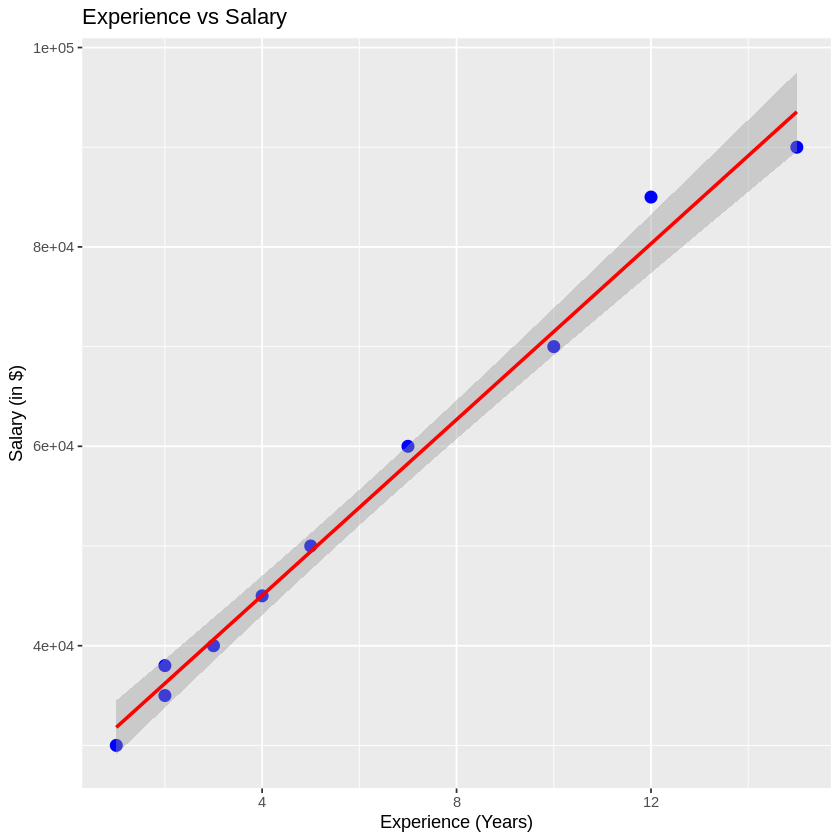

In [8]:
ggplot(data, aes(x = Experience, y = Salary)) +
  geom_point(color = "blue", size = 3) +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Experience vs Salary",
       x = "Experience (Years)",
       y = "Salary (in $)")



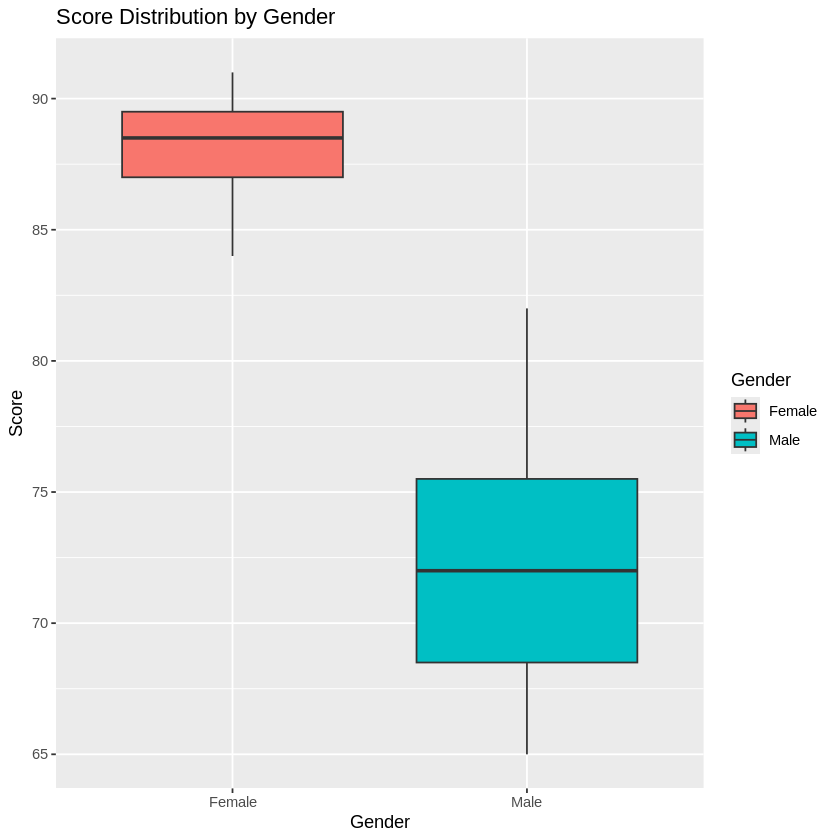

In [10]:
ggplot(data, aes(x = Gender, y = Score, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Score Distribution by Gender",
       x = "Gender",
       y = "Score")



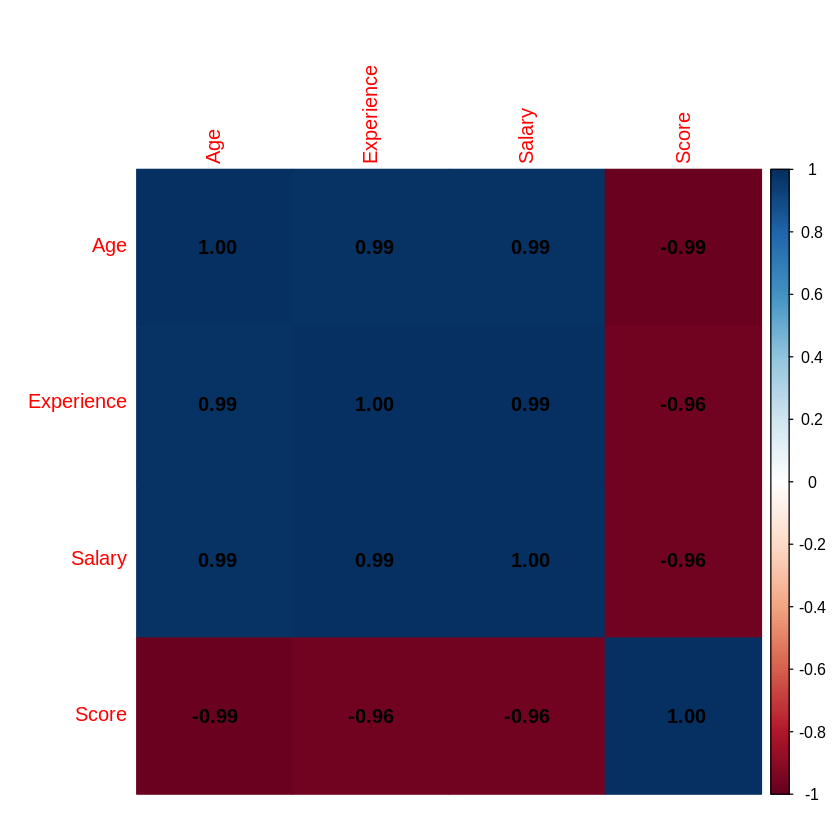

In [11]:
num_data <- data[, sapply(data, is.numeric)]
corr_matrix <- cor(num_data)
corrplot(corr_matrix, method = "color", addCoef.col = "black")
